# <center> THE SPARKS FOUNDATION

# <center>TASK - 1

#   <center>                                                                             Name: Kruti Soni


# <center>```Task : Data Science & Business Analytics -Supervised Machine Learning```

# Problem Statement:


1) Predict the percentage of an student based on the no. of study hours using`supervised ML`

2)Predict what will be the score if a student studies for `9.25` hrs/ day

# Importing required libraries 

In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  
%matplotlib inline

# Loading the dataset

In [2]:
score_dataset = pd.read_csv('C:/Users/genz/Documents/Data Analysis/student_scores - student_scores.csv.txt')

In [3]:
score_dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
score_dataset.shape

(25, 2)

#### **As we can see that there are `25 rows` and `2 columns` in the given dataset.**

# Data Exploration

In [5]:
score_dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
score_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
score_dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

**There is `no null` values in the dataset.**

# Data Visualization

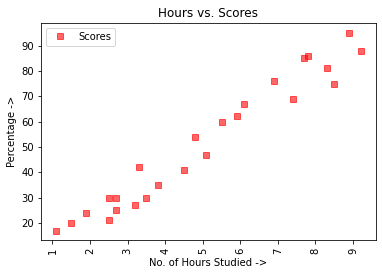

In [8]:
score_dataset.plot(x='Hours', y='Scores', c="red",marker='s',alpha=0.6,linestyle="none") 
plt.xticks(rotation=90)
plt.title('Hours vs. Scores') 
plt.xlabel('No. of Hours Studied ->')  
plt.ylabel('Percentage ->')
plt.show()

**From the above graph, we can infer that there is a `positive linear relation` between the `number of hours` studied and `percentage of score`.**

# Prove:Positive linear relation between the number of hours studied and percentage of score

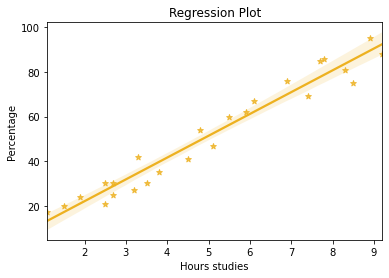

In [9]:
sns.regplot(x = score_dataset['Hours'], y = score_dataset['Scores'],color='#EDB120',marker='*')
plt.title('Regression Plot')
plt.xlabel('Hours studies')
plt.ylabel('Percentage');

Hence,Proved

# Boxplot of dataset

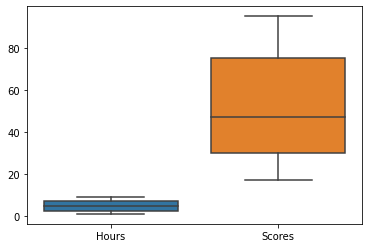

In [10]:
sns.boxplot(data=score_dataset[['Hours','Scores']]);

# Splitting the dataset

In [11]:
X = score_dataset.iloc[:,:-1].values
y = score_dataset.iloc[:,-1].values

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,random_state = 0)

In [13]:
X_train.shape, X_test.shape 

((18, 1), (7, 1))

# Training the Model

**We will use the `80%` of the training data to `train` the `model`.**

In [14]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(X_train,Y_train)
print("Model has been trained successfully!")

Model has been trained successfully!


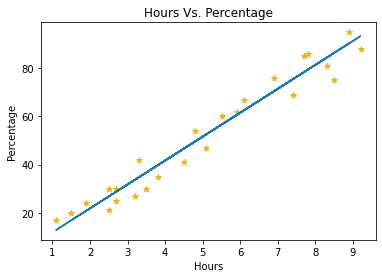

In [15]:
line = lg.coef_ * X + lg.intercept_
x=score_dataset['Hours']
y=score_dataset['Scores']
plt.scatter(x,y,marker='*',c='#EDB120')
plt.plot(X,line)
plt.title("Hours Vs. Percentage")
plt.xlabel('Hours')
plt.ylabel('Percentage');

# Making Prediction

**Now, we will `test` our `algorithm` with the rest `20%` of the data that we have `splitted` and make `predictions`.**

In [16]:
y_pred = lg.predict(X_test).round()
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test] ,'Predicted Scores':[y for y in y_pred]})
prediction

,Hours,Predicted Scores
0,1.5,17.0
1,3.2,34.0
2,7.4,76.0
3,2.5,27.0
4,5.9,61.0
5,3.8,40.0
6,1.9,21.0


# Compairing Actual Score Vs. Predicted Score

In [17]:
compare = pd.DataFrame({'Actual Score': Y_test, 'Predicted Score%':y_pred})
compare

,Actual Score,Predicted Score%
0,20,17.0
1,27,34.0
2,69,76.0
3,30,27.0
4,62,61.0
5,35,40.0
6,24,21.0


# What will be predicted score if a student studies for 9.25 hrs/ day?

In [18]:
hours = np.array([[9.25]])
compare = lg.predict(hours)
print('No. of hours a student studies = {}'.format(hours[0][0]))
print('Predicted Score = %.2f'%compare)

No. of hours a student studies = 9.25
Predicted Score = 93.89


#### According to the `regression` model if a student `studies` `9.25` hours a day, he/she is likely to `score` `93.89` marks

# Evaluating the Model

In [19]:
from sklearn import metrics
print('Mean Asolute Error =',metrics.mean_absolute_error(Y_test,y_pred))
print('Mean Squared Error=',metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

Mean Asolute Error = 4.142857142857143
Mean Squared Error= 21.571428571428573
Root Mean Squared Error: 4.644505202002531


**Small value of `Mean absolute error`,`Mean squared errors` and `Root mean squared errors`, states that the chances of error or wrong forecasting through the model are `very less`.**

# Thank You :)